In [ ]:

!pip install networkx nltk

# Import libraries
import pandas as pd
import networkx as nx

content_df = pd.read_csv('/content/drive/MyDrive/amir8/content.csv')
graph_df = pd.read_csv('/content/drive/MyDrive/amir8/graph.csv')

print(content_df.head())
print(graph_df.head())

                                           URL  \
0         https://learnpython.com/introduction   
1               https://learnpython.com/basics   
2  https://aiworld.com/artificial-intelligence   
3         https://aiworld.com/machine-learning   
4          https://datasciencehub.com/overview   

                              Title  \
0            Introduction to Python   
1                     Python Basics   
2  What is Artificial Intelligence?   
3    Understanding Machine Learning   
4             What is Data Science?   

                                             Content  
0  Python is a versatile programming language use...  
1  The basics of Python include variables, loops,...  
2  Artificial Intelligence (AI) refers to the sim...  
3  Machine Learning (ML) is a subset of AI that e...  
4  Data Science combines statistics, programming,...  
                                        Source  \
0         https://learnpython.com/introduction   
1         https://learnpython.com/

In [ ]:
# Tast Number 01 - Create a graph from graph.csv and load the contents from content.csv
G = nx.from_pandas_edgelist(graph_df, 'Source', 'Target')

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 28
Number of edges: 30


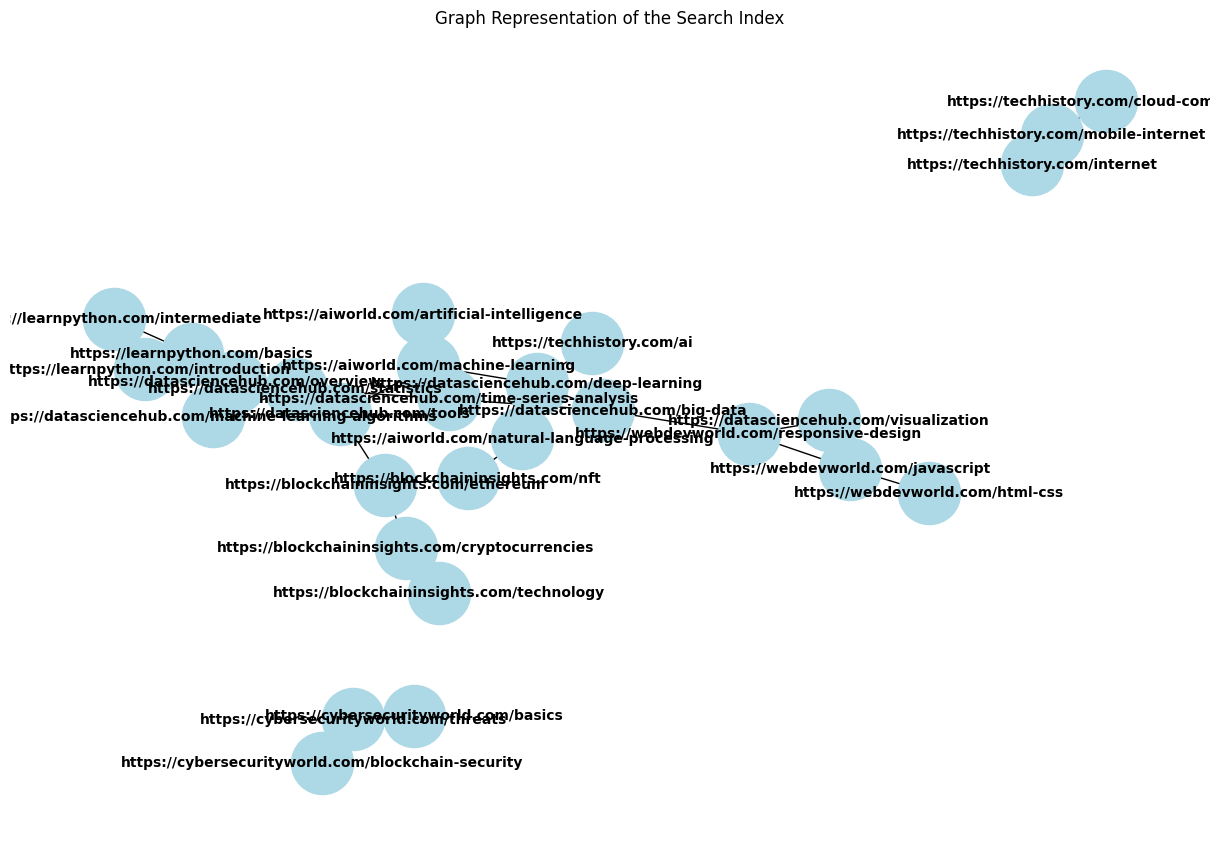

In [ ]:
# Task Number 02 - Create a figure of the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_color='black', font_weight='bold')
plt.title('Graph Representation of the Search Index')
plt.show()

In [ ]:
#  Import NLTK and download stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Task Number 03 -Tokenize the contents, and remove words like articles(a, an, the), prepositions, conjunctions. 
stop_words = set(stopwords.words('english'))
tokenized_contents = {}

for index, row in content_df.iterrows():
    title = row['Title']
    content = row['Content']
    tokens = nltk.word_tokenize(content.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    tokenized_contents[title] = filtered_tokens

#       display
print(tokenized_contents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


{'Introduction to Python': ['python', 'versatile', 'programming', 'language', 'used', 'web', 'development', 'data', 'science', 'ai', 'known', 'simple', 'syntax', 'powerful', 'libraries', 'numpy', 'pandas', 'tensorflow', 'many', 'developers', 'prefer', 'python', 'community', 'support', 'ease', 'learning'], 'Python Basics': ['basics', 'python', 'include', 'variables', 'loops', 'conditional', 'statements', 'functions', 'python', 'interpreted', 'language', 'means', 'write', 'execute', 'code', 'interactively', 'flexibility', 'makes', 'suitable', 'prototyping', 'code'], 'What is Artificial Intelligence?': ['artificial', 'intelligence', 'ai', 'refers', 'simulation', 'human', 'intelligence', 'computers', 'involves', 'tasks', 'natural', 'language', 'processing', 'computer', 'vision', 'ai', 'applications', 'healthcare', 'finance', 'autonomous', 'vehicles'], 'Understanding Machine Learning': ['machine', 'learning', 'ml', 'subset', 'ai', 'enables', 'computers', 'learn', 'patterns', 'data', 'ml', '

In [ ]:
# Task Number 04 - Build an inverted index
from collections import defaultdict

inverted_index = defaultdict(list)

for title, tokens in tokenized_contents.items():
    for token in tokens:
        inverted_index[token].append(title)

# Display inverted index
print(dict(list(inverted_index.items())[:5]))  # Show first 5 entries

{'python': ['Introduction to Python', 'Introduction to Python', 'Python Basics', 'Python Basics', 'Top Data Science Tools'], 'versatile': ['Introduction to Python'], 'programming': ['Introduction to Python', 'What is Data Science?', 'Introduction to JavaScript'], 'language': ['Introduction to Python', 'Python Basics', 'What is Artificial Intelligence?', 'HTML and CSS Basics', 'Introduction to JavaScript'], 'used': ['Introduction to Python', 'What is Data Science?', 'Top Data Science Tools', 'HTML and CSS Basics', 'Introduction to JavaScript']}


In [ ]:
# Task 05 - Build a single-word query-based search system using PageRank
def single_word_search(query):
    if query in inverted_index:
        pages = inverted_index[query]
        pagerank_scores = nx.pagerank(G)
        ranked_pages = sorted(pages, key=lambda x: pagerank_scores.get(x, 0), reverse=True)
        return ranked_pages
    else:
        return []

# Example 
print("Single Word Search Results for 'python':", single_word_search('python'))

Single Word Search Results for 'python': ['Introduction to Python', 'Introduction to Python', 'Python Basics', 'Python Basics', 'Top Data Science Tools']


In [ ]:
# Task 06 - Implement a bag of words query-based search system
def bag_of_words_search(query):
    query_words = query.lower().split()
    result_pages = set()

    for word in query_words:
        if word in inverted_index:
            result_pages.update(inverted_index[word])

    return list(result_pages)

# Example usage
print("Bag of Words Search Results for 'python data':", bag_of_words_search('python data'))

Bag of Words Search Results for 'python data': ['Top Data Science Tools', 'Understanding Blockchain Technology', 'Understanding Machine Learning', 'Python Basics', 'What is Data Science?', 'Introduction to Python']
